In [1]:
version()

'SageMath version 9.2, Release Date: 2020-10-24'

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from scipy.interpolate import interp1d

In [5]:
import multiprocessing as mp

In [6]:
EM = Manifold(4, 'EM', latex_name=r'\mathcal{EM}', structure='Lorentzian')





X.<t,r,th,ph>=EM.chart(r"t r:(2.001,200) th:(0,pi):\theta ph:(0,2*pi):periodic\phi")


In [9]:
 g[0,3]=(-2*a*M^2*sin(th)^2)/r -1/128*(a^3*(2*M*(64*M^8 - 96*M^7*r - 96*M^6*r^2 - 40*M^5*r^3*δq - 30*M^2*r^6*(34*δq - 21*δs3) - 30*M^3*r^5*(22*δq - 7*δs3) + 2205*M*r^7*(2*δq - δs3) + 945*r^8*(-2*δq + δs3) + 
           4*M^4*r^4*(-172*δq + 21*δs3)) - 15*r^4*(-32*M^5*δq + 24*M^4*r*δq + 32*M^3*r^2*δq + 8*M^2*r^3*(40*δq - 21*δs3) - 210*M*r^4*(2*δq - δs3) + 63*r^5*(2*δq - δs3))*log(1 - (2*M)/r) + 
         cos(2*th)*(2*M*(192*M^8 - 160*M^7*r - 160*M^6*r^2 - 120*M^5*r^3*δq - 20*M^4*r^4*(44*δq - 7*δs3) - 350*M^3*r^5*(2*δq - δs3) - 1050*M^2*r^6*(2*δq - δs3) + 3675*M*r^7*(2*δq - δs3) + 1575*r^8*(-2*δq + δs3)) + 
           15*r^4*(32*M^5*δq - 40*M^4*r*δq - 280*M^2*r^3*(2*δq - δs3) + 350*M*r^4*(2*δq - δs3) + 105*r^5*(-2*δq + δs3))*log(1 - (2*M)/r)))*sin(th)^2)/(M^3*r^5) 

In [10]:
 g[3,3]=r^2*sin(th)^2 + (a^2*r^2*(-1 + 3*cos(th)^2)*((-8*M^3*(2*M + r))/r^4 - 5*δq*(3 - (2*M)/r + (3*r)/M + (-3 + (3*r^2)/(2*M^2))*log(1 - (2*M)/r)))*sin(th)^2)/8

In [11]:
g[0,0]=-1 + (2*M)/r + (a^2*(-32*M^6*r - (1 - 3*cos(th)^2)*(16*M^5*(2*M - r)*(M + r) - 5*r^3*δq*(2*M*(M - r)*(2*M^2 + 6*M*r - 3*r^2) + 3*r^2*(-2*M + r)^2*log(1 - (2*M)/r))) + 64*M^6*r*sin(th)^2))/(16*M^2*r^5) 

In [12]:
g[2,2]=r^2+ (a^2*r^2*(-1 + 3*cos(th)^2)*((-8*M^3*(2*M + r))/r^4 - 5*δq*(3 - (2*M)/r + (3*r)/M + (-3 + (3*r^2)/(2*M^2))*log(1 - (2*M)/r))))/8 

In [13]:
 g[1,1]=(1 - (2*M)/r)^(-1) +(-32^(-1))*((a^2*(2*M*(80*M^6 - 24*M^5*r + 8*M^4*r^2 + 10*M^3*r^3*δq + 20*M^2*r^4*δq - 45*M*r^5*δq + 15*r^6*δq) + 15*r^5*(-2*M + r)^2*δq*log(1 - (2*M)/r) + 
         3*cos(2*th)*(2*M*(80*M^6 - 56*M^5*r + 8*M^4*r^2 + 10*M^3*r^3*δq + 20*M^2*r^4*δq - 45*M*r^5*δq + 15*r^6*δq) + 15*r^5*(-2*M + r)^2*δq*log(1 - (2*M)/r))))/(M^2*r^3*(-2*M + r)^2))

In [14]:
X.coord_range()

t: (-oo, +oo); r: (2.00100000000000, 200); th: (0, pi); ph: [0, 2*pi] (periodic)

In [8]:
var('M,b,a,Ω,δq,δs3,q', domain='real')
g = EM.metric()
M=1


In [ ]:
g[0,0] =((2*m)/r - 1) + (1/(16*m^2*r^5))*(a^2)*(((64*m^6)*r)*(sin(th)^2) - (32*m^6)*r -(1 - 3*(cos(th)^2))*(((16*m^5)*(2*m - r))*(m + r) - ((5*r^3)*q)*(((2*m)*(m - r))*(2*m^2 - 3*r^2 + (6*m)*r) + ((3*r^2)*(r - 2*m)^2)*log(1 - (2*m)/r)))) 

g[0,3] = -2*a*(m^2)*((sin(th))^2)/r

##
g[1,1]= 1/(1 - (2*m)/r) - (1/(32*m^2*r^3*(r - 2*m)^2))*(a^2)*((2*m)*(80*m^6 + (8*m^4)*r^2 - (24*m^5)*r + ((10*m^3)*r^3)*q + ((20*m^2)*r^4)*q - ((45*m)*r^5)*q + (15*r^6)*q) + (((15*r^5)*(r - 2*m)^2)*q)*log(1 - (2*m)/r) + (3*cos(2*th))*((2*m)*(80*m^6 + (8*m^4)*r^2 - (56*m^5)*r + ((10*m^3)*r^3)*q + ((20*m^2)*r^4)*q - ((45*m)*r^5)*q + (15*r^6)*q) + (((15*r^5)*(r - 2*m)^2)*q)*log(1 - (2*m)/r))) 



g[2,2] =r^2 + (1/8)*((a^2*r^2)*(3*(cos(th)^2) - 1))*(-(((8*m^3)*(2*m + r))/r^4) - (5*q)*(-((2*m)/r) + (3*r)/m + ((3*r^2)/(2*m^2) - 3)*log(1 - (2*m)/r) + 3))



g[3,3] = (r^2)*(sin(th)^2) + (1/8)*(((a^2*r^2)*(3*(cos(th)^2) - 1))*(-(((8*m^3)*(2*m+ r))/r^4)-(5*q)*(-((2*m)/r) + (3*r)/m + ((3*r^2)/(2*m^2) - 3)*log(1 - (2*m)/r) + 3)))*(sin(th)^2)


In [15]:
def g00(M,r,th,a):return g[0,0](M,r,th,a)
def g03(M,r,th,a):return g[0,3](M,r,th,a)
def g11(M,r,th,a):return g[1,1](M,r,th,a)
def g22(M,r,th,a):return g[2,2](M,r,th,a)
def g33(M,r,th,a):return g[3,3](M,r,th,a)
def D(M,r,th,a): return (g03(M,r,th,a))^2-g00(M,r,th,a)*g33(M,r,th,a)

In [16]:
E.<x,y,z> = EuclideanSpace()
phi = M.diff_map(E, [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)])
phi.display()

AttributeError: 'sage.rings.integer.Integer' object has no attribute 'diff_map'

In [ ]:
B5(a,q)=D(m,r,th,a)
L5(r,th)=B5(0.327352,1)

In [ ]:
B7(a,q)=g11(m,r,th,a)
L7(r,th)=B7(0.327352,1)

In [ ]:
X.add_restrictions(L5(r,th)>0.001)

In [ ]:

th0=pi/2
s = var('s')  # affine parameter along a geodesic


In [ ]:
(-0.095/g11(m,r,pi/2,a).subs(r=2.297,a=0.327352,q=1))

In [ ]:
g11(m,r,th0,a).subs(r=2.29,a=0.327352,q=1)

In [ ]:
def initial_vector2(r0,b,pr0=0,  ph0=0, E=1, inward=False):
    t0,th0=0,pi/2
    L = -b*E
    vt0=(E*g33(m,r0,th0,a)+L*g03(m,r0,th0,a))/(D(m,r0,th0,a))
    vr0=pr0
    if inward:
        vr0 = - vr0
    vth0 = sqrt((((1/D(m,r0,th0,a))*((L^2)*g00(m,r0,th0,a)+2*E*L*g03(m,r0,th0,a)+(E^2)*g33(m,r0,th0,a)))-((pr0)^2)*g11(m,r0,th0,a))/g22(m,r0,th0,a))
    vph0 = -(1/D(m,r0,th0,a))*(E*g03(m,r0,th0,a)+L*(g00(m,r0,th0,a)))
    p0 = M((t0, r0, th0, ph0), name='p_0')
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

In [ ]:
 #03   
v0 = initial_vector2(r0=2.2908,b=-4.30434,pr0=0.00003, ph0=0, inward=False)
c3 = M.integrated_geodesic(g, (s, 0, 5000), v0)
sol = c3.solve(0.1,method='dopri5',parameters_values={a:0.327352,q:1},
                solution_key='sol',verbose=True) 

interp = c3.interpolate(solution_key='sol',
                interpolation_key='interp 3', verbose=True)

    




In [ ]:
sepa=[]
for i in range(len(sol)):
    sepa.append([sol[i][2],sol[i][3]])

In [ ]:
graphtest=scatter_plot(sepa,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=10,zorder=2,edgecolor='cyan',facecolor='cyan')
show(graphtest)

In [ ]:
graph1 = c3.plot_integrated(ambient_coords=(r,th),prange=[0,2000], plot_points=3000,
                            aspect_ratio=1,color='blue') 
                              

In [ ]:
show(graph1,xmin=2.2,xmax=2.3,ymin=1.5,ymax=1.61)

In [ ]:
my_df=pd.DataFrame(sepa)
my_df.to_csv('orb_2.22905_0.00004.csv',index=False,header=False)

In [ ]:
B7(a,δq,δs3)=g11(m,r,th,a)
L6(r,th)=B7(0.346,1,1)

In [ ]:
B5(a,δq,δs3)=D(m,r,th,a)
L5(r,th)=B5(0.346,1,1)

In [ ]:
graph7 = implicit_plot(L6,(r,2,5),(th,0,pi),linewidth=1,plot_points=200,color='green')
graph8 = implicit_plot(L5,(r,2,5),(th,0,pi),linewidth=1,plot_points=200,color='magenta')

In [ ]:
##4.289_0.3268_1_0.5

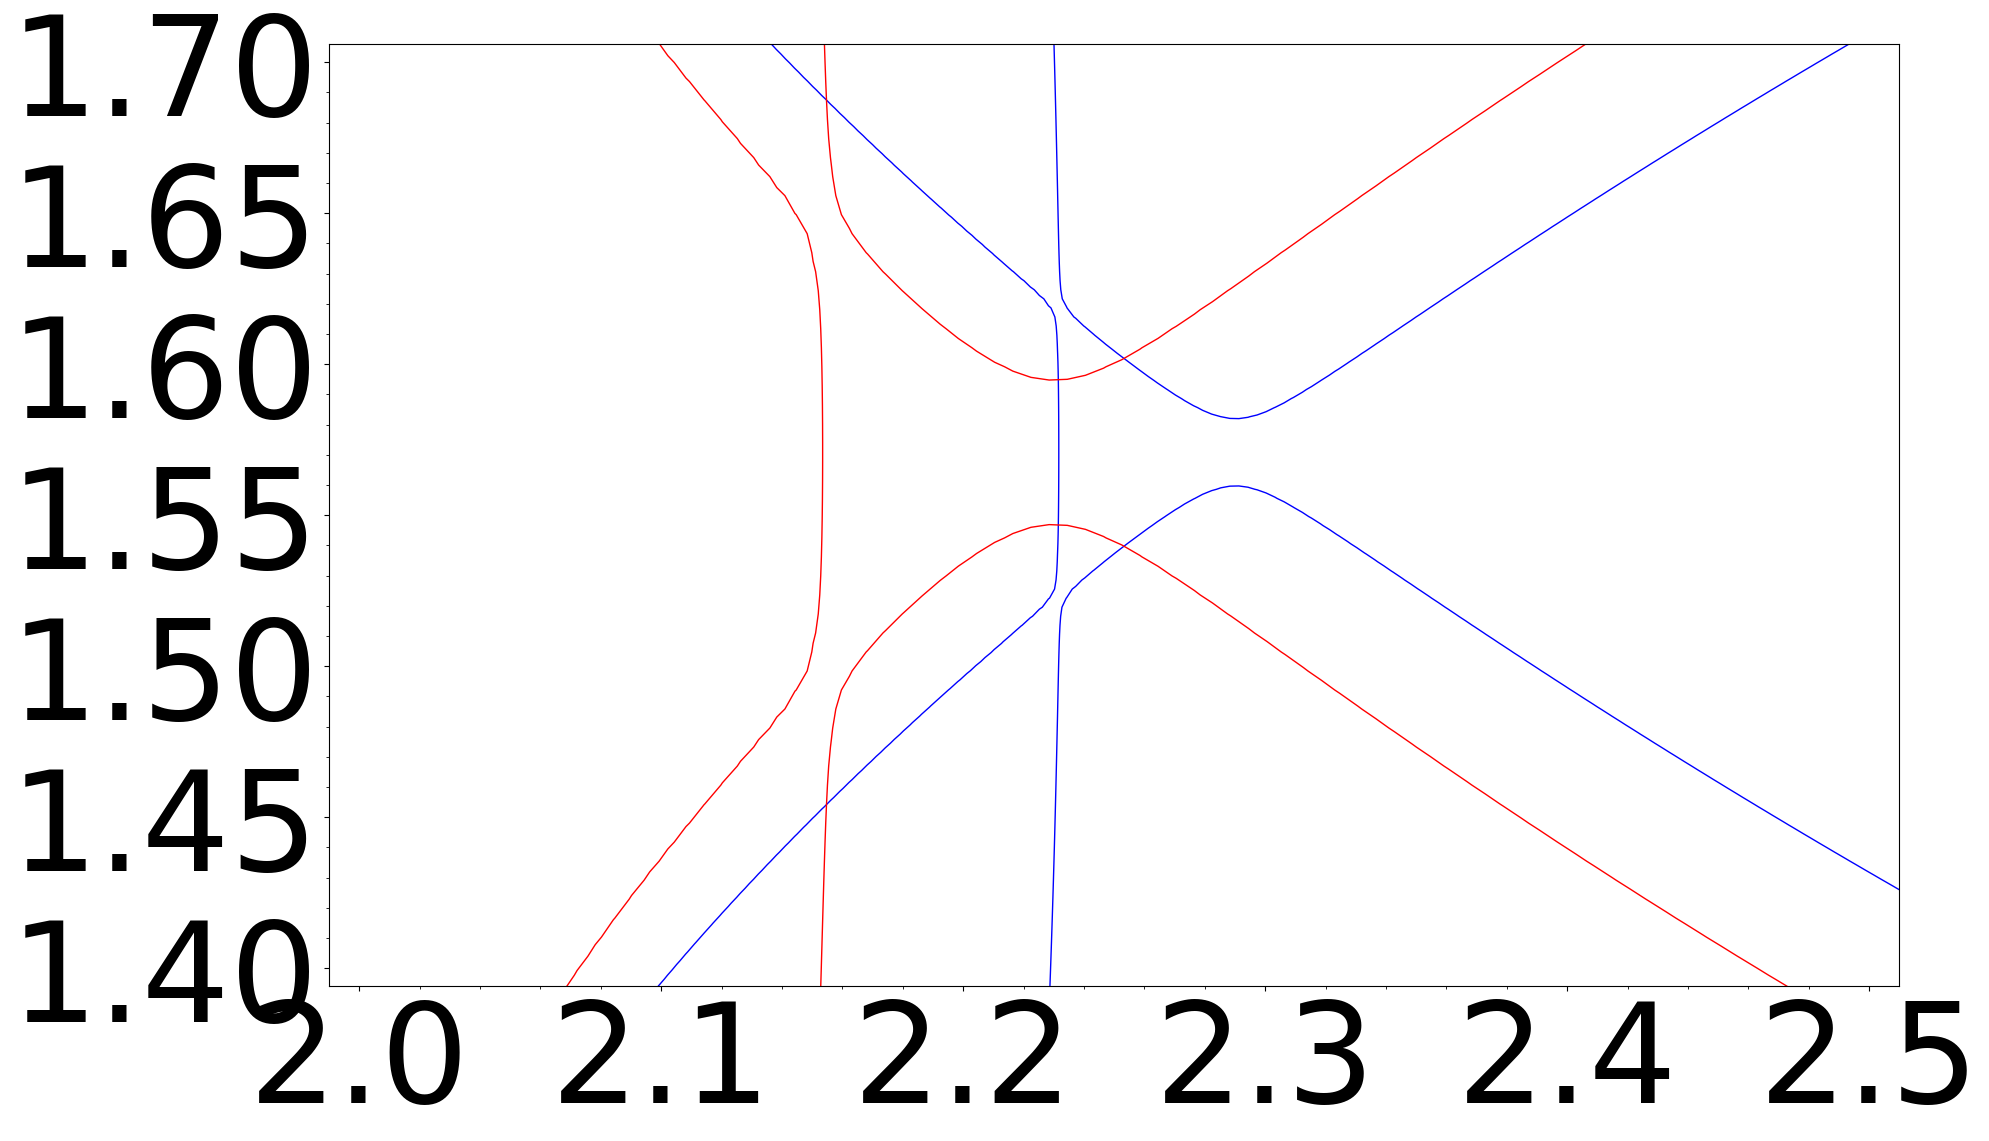

In [20]:
b=4.10232
sep(M,r,th,a)=-((1/D(M,r,th,a))*((b^2)*g00(M,r,th,a)+2*b*g03(M,r,th,a)+g33(M,r,th,a)))
var('r,th')
B6(a,δq,δs3)=sep(M,r,th,a)
L7(r,th)=sep(M,r,th,a).subs(a=0.41749,δq=0.5,δs3=0.5)


graph7 = implicit_plot(L7,(r,2,5),(th,0,pi),linewidth=1,plot_points=500,color='red')

b=4.29227
sep(M,r,th,a)=-((1/D(M,r,th,a))*((b^2)*g00(M,r,th,a)+2*b*g03(M,r,th,a)+g33(M,r,th,a)))
var('r,th')
B6(a,δq,δs3)=sep(M,r,th,a)
L7(r,th)=sep(M,r,th,a).subs(a=0.32635,δq=1,δs3=0.5)


graph6 = implicit_plot(L7,(r,2,5),(th,0,3),linewidth=1,plot_points=1000,color='blue')
show(graph6+graph7,xmin=2,xmax=2.5,ymin=1.4,ymax=1.7,figsize=20,fontsize=100)



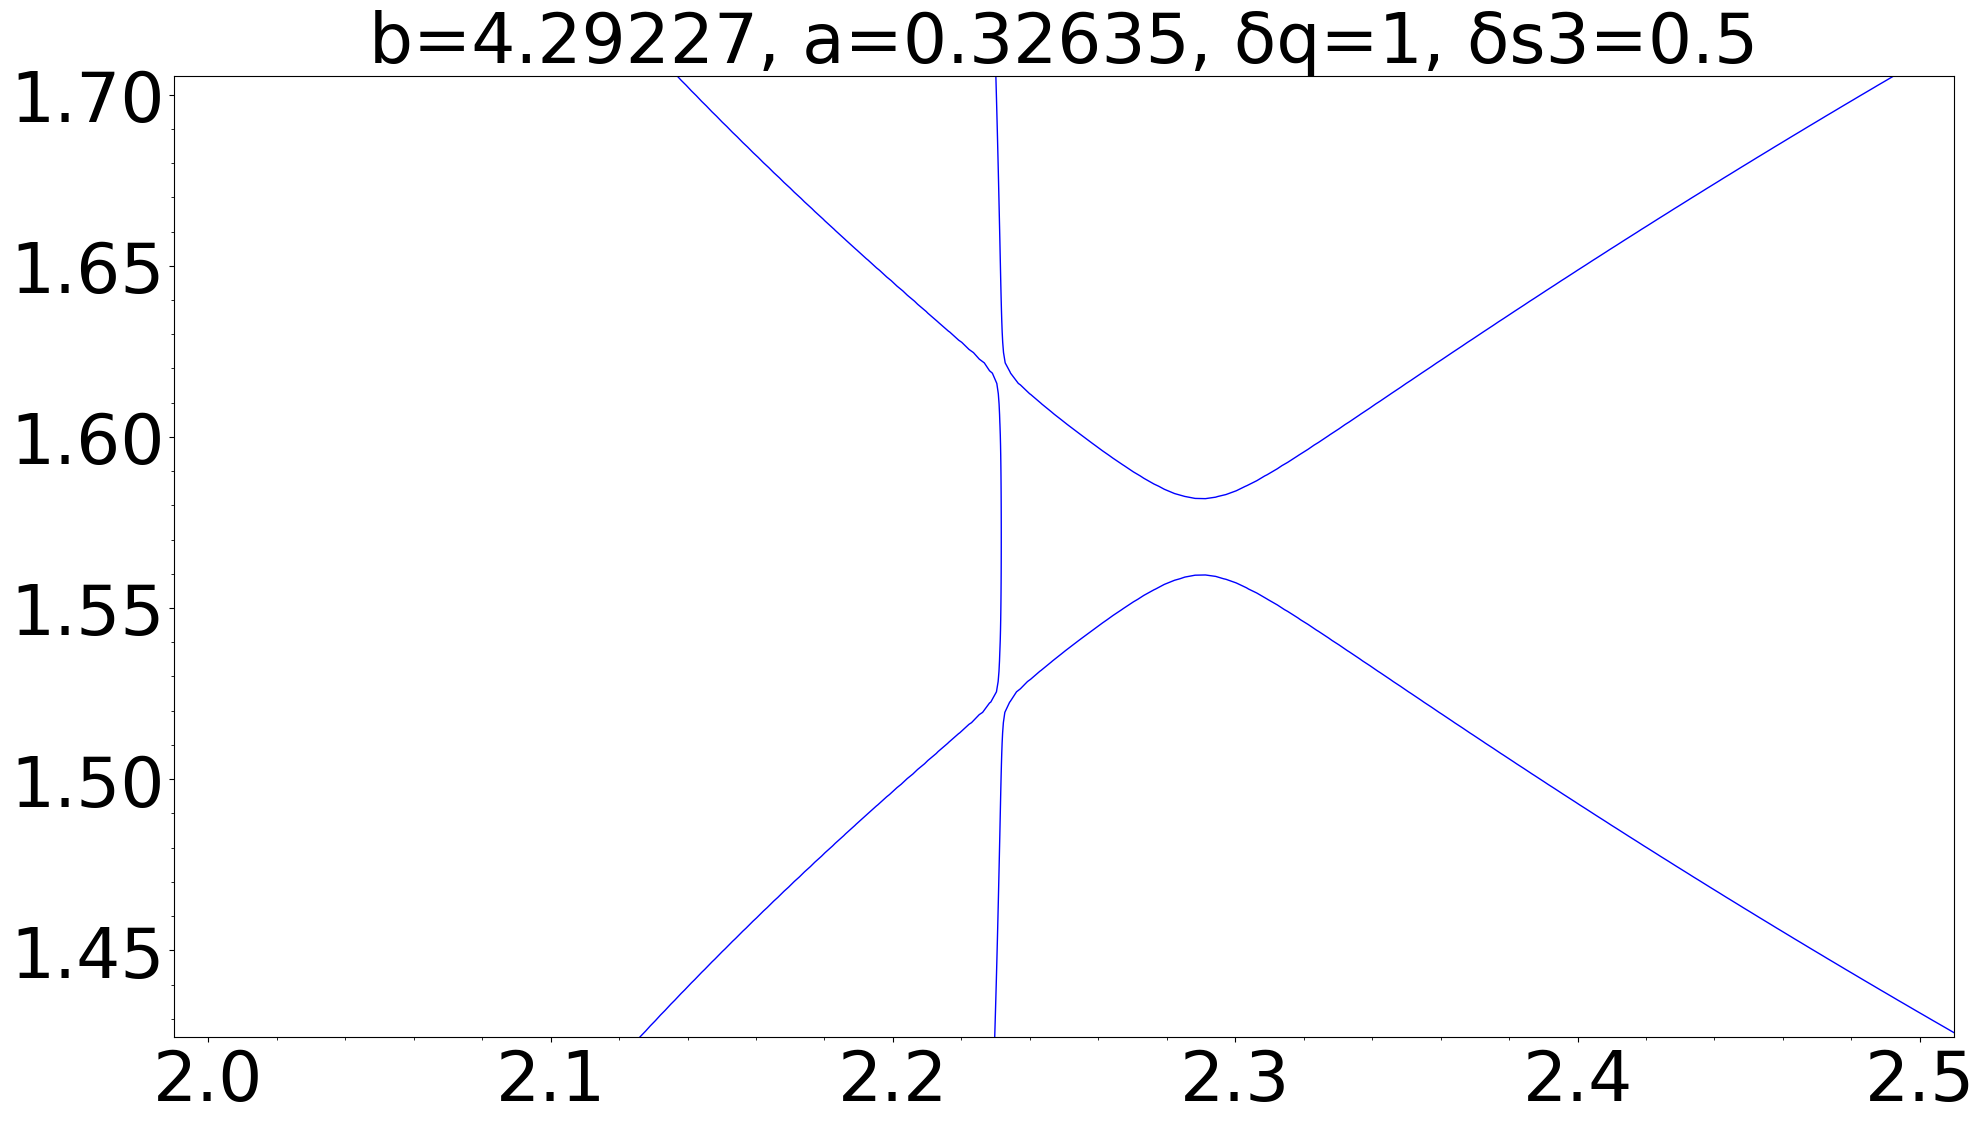

In [23]:
show(graph6,xmin=2,xmax=2.5,ymin=1.43,ymax=1.7,figsize=20,fontsize=50,title='b=4.29227, a=0.32635, δq=1, δs3=0.5')

In [24]:
graph6.save('test_1_0.5.png')

In [ ]:
test=graph6+graph7+graph8
show(test,xmin=2,xmax=2.5,ymin=1.4,ymax=1.7,figsize=10,fontsize=10)

In [ ]:
test.save('4.228021_0.347097_1_1.png')

In [ ]:
b0(m,r,th,a)=(1/g00r(m,r,th,a))*(-sqrt((g03r(m,r,th,a))^2 -g00r(m,r,th,a)*g33r(m,r,th,a))-g03r(m,r,th,a))

In [ ]:
g00r(M,r,th,a)=diff(g00(M,r,th,a),r)

In [ ]:
g03r(M,r,th,a)=diff(g03(M,r,th,a),r)

In [ ]:
g33r(M,r,th,a)=diff(g33(M,r,th,a),r)

In [ ]:
g00th(M,r,th,a)=diff(g00(M,r,th,a),th)

In [ ]:
g03th(M,r,th,a)=diff(g03(M,r,th,a),th)

In [ ]:
g33th(M,r,th,a)=diff(g33(M,r,th,a),th)

In [ ]:
dekaepta(M,r,th,a)=g33(M,r,th,a)*((g00r(M,r,th,a))^2)+2*g00(M,r,th,a)*(g03r(M,r,th,a))^2 -g00r(M,r,th,a)*(g00(M,r,th,a)*g33r(M,r,th,a)+2*g03(M,r,th,a)*g03r(M,r,th,a))-2*sqrt((g03r(M,r,th,a))^2 -g00r(M,r,th,a)*g33r(M,r,th,a))*(g03(M,r,th,a)*g00r(M,r,th,a)-g00(M,r,th,a)*g03r(M,r,th,a))

In [ ]:
dekaennia(M,r,th,a)=g33th(M,r,th,a)*((g00r(M,r,th,a))^2)+2*g00th(M,r,th,a)*(g03r(M,r,th,a))^2 -g00r(M,r,th,a)*(g00th(M,r,th,a)*g33r(M,r,th,a)+2*g03th(M,r,th,a)*g03r(M,r,th,a))-2*sqrt((g03r(M,r,th,a))^2 -g00r(M,r,th,a)*g33th(M,r,th,a))*(g03th(M,r,th,a)*g00r(M,r,th,a)-g00th(M,r,th,a)*g03r(M,r,th,a))

In [ ]:
eikosi(m,r,th,a)=dekaennia(m,r,th,a)-dekaepta(m,r,th,a)

In [ ]:
L9=b0(m,2.3,th,a).subs(δq=0.4,δs3=0.7)

In [ ]:
L8=dekaennia(M,2.3,th,a).subs(δq=1,δs3=1)

In [ ]:

graph10 = implicit_plot(L8,(a,0,5),(th,0,3),linewidth=1,plot_points=500,color='red')
show(graph10,figsize=20)

In [ ]:
eq1=dekaepta(m,r,th,a)==0
eq2=dekaennia(m,r,th,a)==0

In [ ]:
solve([eq1,eq2,δq==1,δs3==1],r,th,δq,δs3)

In [ ]:
Veff(M,r,th,a,δq,δs3)=-((1/D(M,r,th,a))*((b^2)*g00(M,r,th,a)+2*b*g03(M,r,th,a)+g33(M,r,th,a)))

In [ ]:
Veffr=diff(Veff,r)

In [ ]:
Veffth=diff(Veff,th)

In [ ]:
import scipy.optimize as opt

from numpy import exp

def f(variables) :
    (r,th,b) = variables
    first_eq = Veff(M,r,th,a).subs(a=0.31589413,δq=1,δs3=0.1)
    second_eq = Veffr(M,r,th,a).subs(a=0.31589413,δq=1,δs3=0.1)
    third_eq= Veffth(M,r,th,a).subs(a=0.31589413,δq=1,δs3=0.1)
    return [first_eq, second_eq,third_eq]

In [ ]:

solution = opt.fsolve(f, [2.2, 1.2,4])

In [ ]:
print(solution)

In [ ]:
####periodics open#########

sepblue=[]
sepblue=pd.read_csv('separ1_2.297_main periodic.csv',delimiter=',')
sepblue=sepblue.values.tolist()

seppurple=[]
seppurple=pd.read_csv('separ2_r0=2.23525,pr0=0.0153724__ind neg.csv',delimiter=',')
seppurple=seppurple.values.tolist()

sepgorange=[]
seporange=pd.read_csv('r0=2.20627,pr0=0.00005_almost_terma aristera.csv',delimiter=',')
seporange=seporange.values.tolist()

seppink=[]
seppink=pd.read_csv('r0=2.24611111111111,pr0=0.0035, weird pair.csv',delimiter=',')
seppink=seppink.values.tolist()

sepred=[]
sepred=pd.read_csv('orb_red_2.2273_0.csv',delimiter=',')
sepred=sepred.values.tolist()

sepgreen=[]
sepgreen=pd.read_csv('orb_green_2.2291_0.csv',delimiter=',')
sepgreen=sepgreen.values.tolist()

sepcyan=[]
sepcyan=pd.read_csv('orb_cyan_2.2461,-0.0035.csv',delimiter=',')
sepcyan=sepcyan.values.tolist()

sepyellown=[]
sepyellow=pd.read_csv('separ2_r0=2.23525,pr0=0.0153724__ind neg.csv',delimiter=',')
sepyellow=sepyellow.values.tolist()

sepred=[]
sepred=pd.read_csv('separ2_r0=2.23525,pr0=0.0153724__ind neg.csv',delimiter=',')
sepred=sepred.values.tolist()








In [ ]:
#periodics closed#####

sepblue1=[]
sepblue1=pd.read_csv('orb_kleisto_blue.csv',delimiter=',')
sepblue1=sepblue1.values.tolist()

sepblue2=[]
sepblue2=pd.read_csv('orb_kleisto_blue_2_speir.csv',delimiter=',')
sepblue2=sepblue2.values.tolist()

sepblue3=[]
sepblue3=pd.read_csv('orb_kleisto_blue_3_speir.csv',delimiter=',')
sepblue3=sepblue3.values.tolist()

sepblue4=[]
sepblue4=pd.read_csv('orb_kleisto_blue_4_speir.csv',delimiter=',')
sepblue4=sepblue4.values.tolist()

sepblue5=[]
sepblue5=pd.read_csv('orb_kleisto_blue_5_speir.csv',delimiter=',')
sepblue5=sepblue5.values.tolist()



seppurple=[]
seppurple=pd.read_csv('orb_kleisto_PINK_orb.csv',delimiter=',')
seppurple=seppurple.values.tolist()

sepyellow=[]
sepyellow=pd.read_csv('orb_kleisto_YELLOW_orb.csv',delimiter=',')
sepyellow=sepyellow.values.tolist()

seporange=[]
seporange=pd.read_csv('orb_kleisto_orange_orb.csv',delimiter=',')
seporange=seporange.values.tolist()

sepred=[]
sepred=pd.read_csv('orb_kleisto_red_orb.csv',delimiter=',')
sepred=sepred.values.tolist()


sepbluektos=[]
sepbluektos=pd.read_csv('orb_2.22905_0.00004.csv',delimiter=',')
sepbluektos=sepbluektos.values.tolist()


In [ ]:
pappas1=[]
pappas1=pd.read_csv('pappas1.csv',delimiter=',')
pappas1=pappas1.values.tolist()

In [ ]:
graphorb=scatter_plot(seporange,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=10,ticks=[0.07,0.07],zorder=1,edgecolor='blue',facecolor='blue')

In [ ]:
graphkl1=scatter_plot(seporange,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=20,ticks=[0.07,0.07],zorder=2,edgecolor='black',facecolor='orange')
graphkl2=scatter_plot(sepbluektos,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=10,ticks=[0.07,0.07],zorder=1,edgecolor='blue',facecolor='blue')


In [ ]:
graph=graphkl1+graph5

In [ ]:

show(graph,figsize=50,fontsize=140, xmin=2.15 ,xmax=2.35 ,ymin=1.45 ,ymax=1.7,ticks=[0.07,0.07],axes_labels=[r'$r$', r'$\theta$'],frame=True)

In [ ]:
graph.save('orangeorbcl.png')

In [ ]:
L=4.304332
Veff(r,th)=((1/D(m,r,th,a))*((L^2)*g00(m,r,th,a)+2*L*g03(m,r,th,a)+g33(m,r,th,a))).subs(a=0.327352,q=1)

In [ ]:
K=Veff.hessian()

In [ ]:
tr(r,th)=K.trace()

In [ ]:
tr(2.2908,pi/2)

In [ ]:
detr(r,th)=K.determinant()

In [ ]:
detr

In [ ]:
contour_plot(Veff(r,th), (r,2,2.4), (th,1.41,1.71), fill=False, plot_points=150)